In [1]:
import histfuncs as hf
import csv
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt

seed = 1234
np.random.seed(seed)

In [2]:
params = [
    {
        'p': 0.5,
        'alpha0': 0.6,
        'beta0': 0.6,
        'alpha1': 3,
        'beta1': 4
    },
    {
        'p': 0.8,
        'alpha0': 0.6,
        'beta0': 0.6,
        'alpha1': 3,
        'beta1': 4
    },
    {
        'p': 0.5,
        'alpha0': 2,
        'beta0': 1,
        'alpha1': 1,
        'beta1': 2
    },
    {
        'p': 0.8,
        'alpha0': 2,
        'beta0': 1,
        'alpha1': 1,
        'beta1': 2
    }
]

def pred_func_gen(p, alpha0, beta0, alpha1, beta1):
    def pred_func(x):
        x1, x2 = x
        # A(x) = log(B(α0, β0)2/B(α1, β1)2)+ log (p) − log (1 − p) + (α1 − α0)[ log(x1) + log(x2)]+ (β1 − β0)[ log(1 − x1) + log(1 − x2)]
        ax = (
            math.log(scipy.special.beta(alpha0, beta0)**2/scipy.special.beta(alpha1, beta1)**2) 
            + math.log(p) - math.log(1-p) 
            + (alpha1 - alpha0)*(math.log(x1) + math.log(x2)) 
            + (beta1 - beta0)*(math.log(1-x1) + math.log(1-x2))
        )

        return(1 if ax > 0 else 0)
    return pred_func

In [23]:
def read_file(problem):
    f = open('assignment_train_sample.csv', 'r')
    reader = csv.reader(f)
    
    
    next(reader)

    x1_max = 0
    x1_min = 1
    x2_max = 0
    x2_min = 1
    X = np.zeros((250, 2))
    Y = np.zeros(250)

    for i, row in enumerate(reader):
        x1, x2, y = row[(problem-1)*3+1:(problem-1)*3+4]

        x1 = float(x1)
        x2 = float(x2)
        y = float(y)

        # append the data to the list 
        X[i][0] = x1
        X[i][1] = x2
        Y[i] = y
        
        # update the max and min
        x1_max = max(x1_max, x1)
        x1_min = min(x1_min, x1)
        x2_max = max(x2_max, x2)
        x2_min = min(x2_min, x2)
        
    f.close()

    return X, Y, x1_max, x1_min, x2_max, x2_min

### Question 2

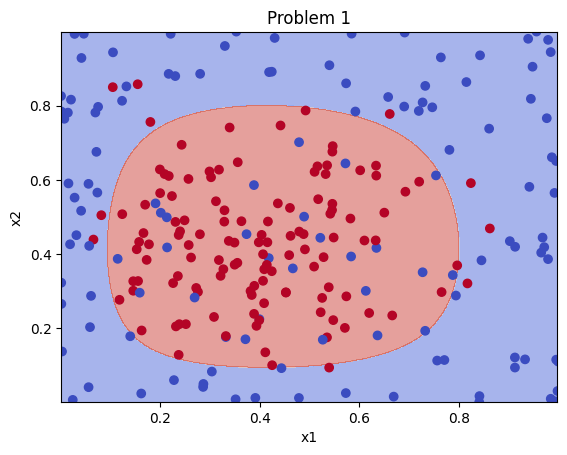

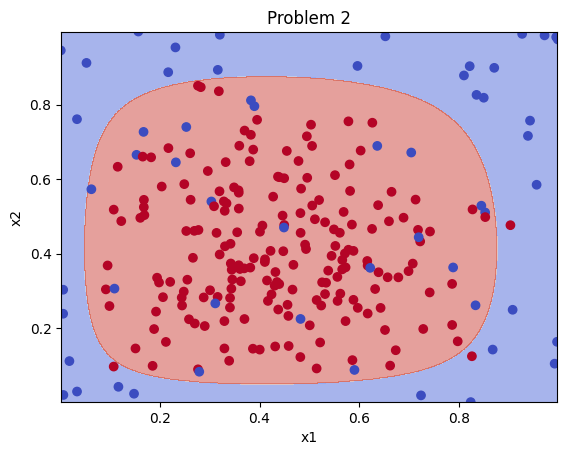

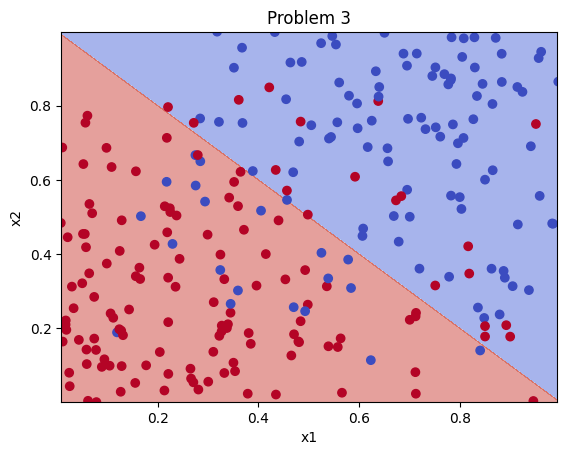

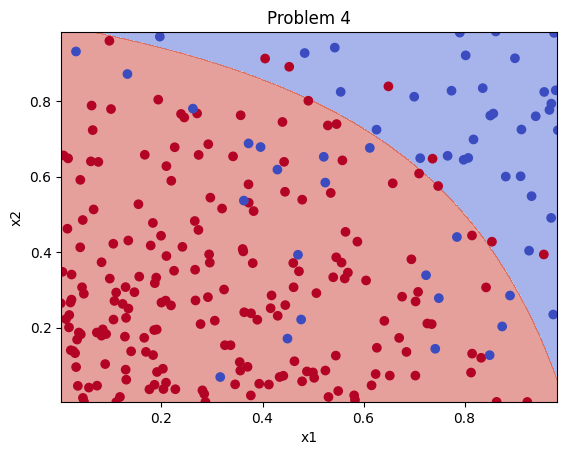

In [24]:
for problem in range(1, 5):

    # Load the data
    X, Y, x1_max, x1_min, x2_max, x2_min = read_file(problem)

    pred_func = pred_func_gen(**params[problem-1])
    hf.plot_dec_bound(h=0.001, predict_func=pred_func, x1min=x1_min, x1max=x1_max, x2min=x2_min,
                  x2max=x2_max, X=X, y=Y, title=f"Problem {problem}", label_1="x1", label_2="x2")

### Question 3

In [25]:
n = 1000000
for problem in range(1, 5):
    Y, X = hf.sim_sample(n, **params[problem-1])
    pred_func = pred_func_gen(**params[problem-1])

    # calculate bayes risk
    bayes_risk = 0
    for (x, y) in zip(X, Y):
        pred = pred_func(x)
        if pred != y:
            bayes_risk += 1
        
    bayes_risk /= n
    print(f"Problem {problem} Bayes Risk: {bayes_risk}")


Problem 1 Bayes Risk: 0.175448
Problem 2 Bayes Risk: 0.094345
Problem 3 Bayes Risk: 0.16678
Problem 4 Bayes Risk: 0.115948


### Question 4

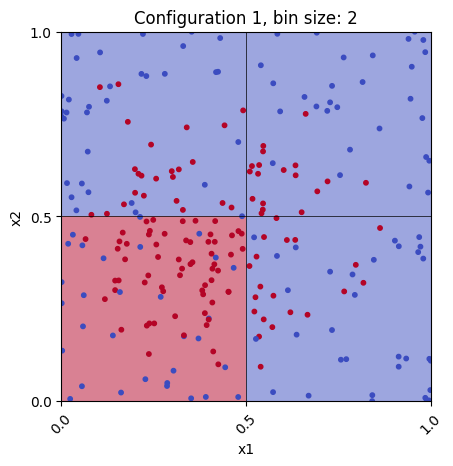

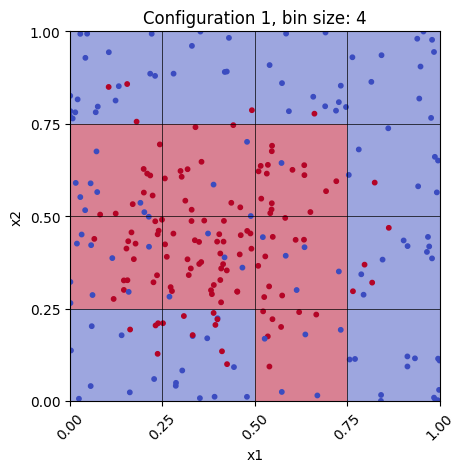

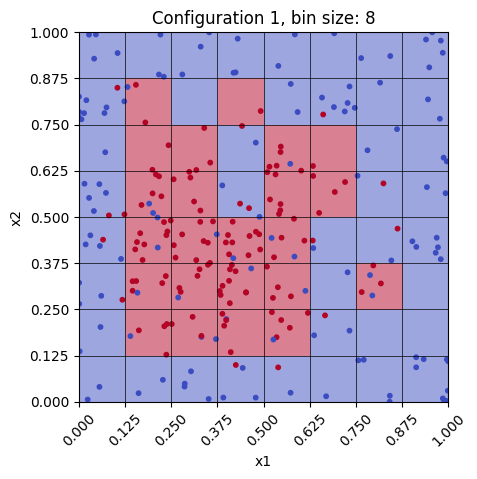

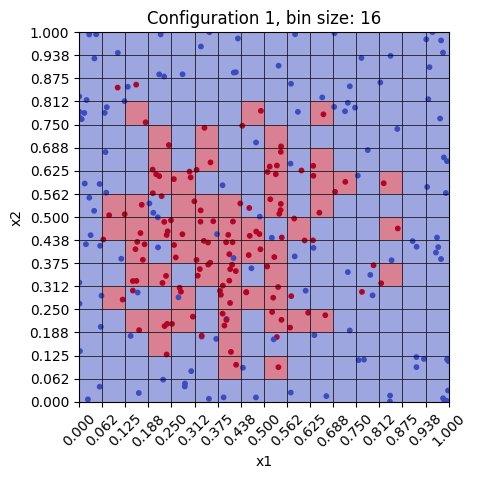

In [120]:
# histogram classifcation of 1st configuration
X, Y,_,_,_,_ = read_file(1)
r_vec = [2,4,8,16]

# empriical risk prediction / hist fit
for bin_size in [2,4,8,16]:
    pred_mat, edges = hf.hist_fit(X, Y, bin_size)

    plt.imshow(pred_mat.T, extent=[edges[0][0], edges[0][-1], edges[1][0], edges[1][-1]], origin='lower', cmap='coolwarm', alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=Y, s=10, cmap=plt.cm.coolwarm)

    plt.title(f"Configuration 1, bin size: {bin_size}")
    plt.xticks(np.arange(0, 1+1/bin_size, 1/bin_size), rotation=45)
    plt.yticks(np.arange(0, 1+1/bin_size, 1/bin_size))
    plt.grid(True, color='black', linestyle='-', linewidth=0.5)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

### Question 5

In [124]:
def find_emperical_risk(X,Y,bin_size):
    pred_mat, edges = hf.hist_fit(X, Y, bin_size)

    emperical_risk = 0
    for x,y in zip(X,Y):
        pred = hf.hist_predict(x, pred_mat, edges)
        if pred != y:
            emperical_risk += 1

    emperical_risk /= len(X)

    return emperical_risk

In [125]:
for problem in range(1, 5):
    X, Y,_,_,_,_ = read_file(problem)
    for bin_size in [2,4,8,16]:
        print(f"Problem {problem} bin size {bin_size} emperical risk: {find_emperical_risk(X,Y,bin_size)}")

Problem 1 bin size 2 emperical risk: 0.372
Problem 1 bin size 4 emperical risk: 0.232
Problem 1 bin size 8 emperical risk: 0.144
Problem 1 bin size 16 emperical risk: 0.08
Problem 2 bin size 2 emperical risk: 0.216
Problem 2 bin size 4 emperical risk: 0.144
Problem 2 bin size 8 emperical risk: 0.092
Problem 2 bin size 16 emperical risk: 0.056
Problem 3 bin size 2 emperical risk: 0.204
Problem 3 bin size 4 emperical risk: 0.136
Problem 3 bin size 8 emperical risk: 0.112
Problem 3 bin size 16 emperical risk: 0.068
Problem 4 bin size 2 emperical risk: 0.128
Problem 4 bin size 4 emperical risk: 0.116
Problem 4 bin size 8 emperical risk: 0.088
Problem 4 bin size 16 emperical risk: 0.032
